## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation
import matplotlib.pyplot as plt
%matplotlib inline

## Example

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(input_layer)
            x = Activation("relu")(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = Activation("relu")(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## BN 放在 Activation 之前

In [7]:
def build_mlp_bn(input_shape, output_units=10, num_neurons=[512, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
        else:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## BN 放在 Input Layer 後

In [8]:
def build_mlp_in(input_shape, output_units=10, num_neurons=[512, 128, 32]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = Activation("relu")(x)
        else:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            x = Activation("relu")(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
> BATCH_SIZE = 1024 --> [2, 16, 32, 128, 256]

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
MOMENTUM = 0.95
BATCH_SIZE = [2, 16, 32, 128, 256]

In [10]:
def run(batch_size):
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    print('Batch size = %s' % batch_size)

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

## batch_size = 2

In [11]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512 

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2723 - accuracy: 0.1548 - val_loss: 2.3950 - val_accuracy: 0.2046
Epoch 2/30
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2234 - accuracy: 0.1736 - val_loss: 8.0626 - val_accuracy: 0.2301
Epoch 3/30
50000/50000 [==============================] - 180s 4ms/step - loss: 2.2132 - accuracy: 0.1802 - val_loss: 6.1401 - val_accuracy: 0.2372
Epoch 4/30
50000/50000 [==============================] - 180s 4ms/step - loss: 2.2070 - accuracy: 0.1859 - val_loss: 14.7085 - val_accuracy: 0.2306
Epoch 5/30
50000/50000 [==============================] - 180s 4ms/step - loss: 2.2136 - accuracy: 0.1814 - val_loss: 5.4924 - val_accuracy: 0.2317
Epoch 6/30
50000/50000 [==============================] - 180s 4ms/step - loss: 2.2061 - accuracy: 0.1841 - val_loss: 96.9190 - val_accuracy: 0.2292
Epoch 7/30
50000/50000 [==============================] - 18

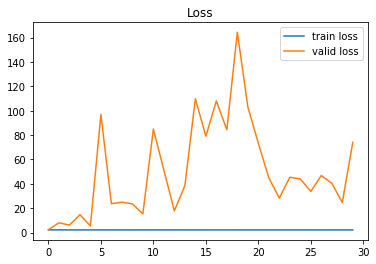

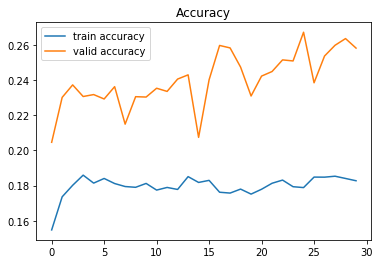

In [12]:
run(BATCH_SIZE[0])

## batch_size = 16

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 23s 459us/step - loss: 1.9401 - accuracy: 0.2995 - val_loss: 16.8056 - val_accuracy: 0.3468
Epoch 2/30
50000/50000 [==============================] - 23s 459us/step - loss: 1.8361 - accuracy: 0.3372 - val_loss: 15.6867 - val_accuracy: 0.3798
Epoch 3/30
50000/50000 [==============================] - 23s 462us/step - loss: 1.7628 - accuracy: 0.3644 - val_loss: 13.6252 - val_accuracy: 0.4070
Epoch 4/30
50000/50000 [==============================] - 23s 466us/step - loss: 1.7088 - accuracy: 0.3879 - val_loss: 16.0456 - val_accuracy: 0.4285
Epoch 5/30
50000/50000 [==============================] - 23s 461us/step - loss: 1.6737 - accuracy: 0.3991 - val_loss: 3.6267 - val_accuracy: 0.4418
Epoch 6/30
50000/50000 [==============================] - 23s 466us/step - loss: 1.6424 - accuracy: 0.4152 - val_loss: 11.9067 - val_accuracy: 0.4444
Epoch 7/30
50000/50000 [===========================

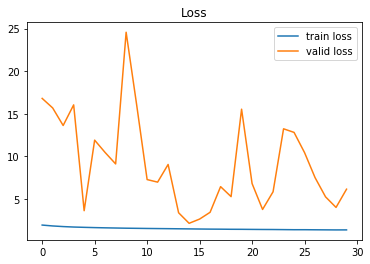

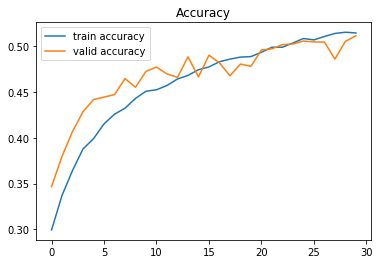

In [13]:
run(BATCH_SIZE[1])

## batch_size = 32

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s 236us/step - loss: 1.2731 - accuracy: 0.5497 - val_loss: 3.0804 - val_accuracy: 0.5053
Epoch 2/30
50000/50000 [==============================] - 12s 236us/step - loss: 1.2580 - accuracy: 0.5556 - val_loss: 3.4985 - val_accuracy: 0.5196
Epoch 3/30
50000/50000 [==============================] - 12s 238us/step - loss: 1.2532 - accuracy: 0.5569 - val_loss: 3.5601 - val_accuracy: 0.5096
Epoch 4/30
50000/50000 [==============================] - 12s 238us/step - loss: 1.2413 - accuracy: 0.5605 - val_loss: 8.0387 - val_accuracy: 0.5156
Epoch 5/30
50000/50000 [==============================] - 12s 238us/step - loss: 1.2311 - accuracy: 0.5637 - val_loss: 8.9869 - val_accuracy: 0.5179
Epoch 6/30
50000/50000 [==============================] - 12s 237us/step - loss: 1.2275 - accuracy: 0.5636 - val_loss: 4.0731 - val_accuracy: 0.5052
Epoch 7/30
50000/50000 [==============================] 

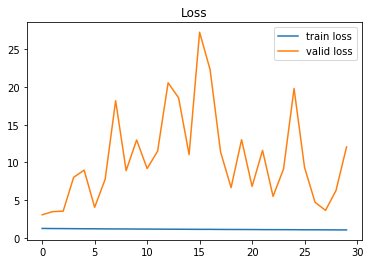

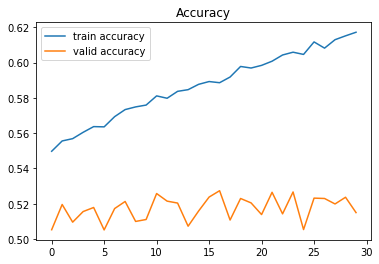

In [14]:
run(BATCH_SIZE[2])

## batch_size = 128

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 70us/step - loss: 0.9507 - accuracy: 0.6647 - val_loss: 2.5847 - val_accuracy: 0.5362
Epoch 2/30
50000/50000 [==============================] - 4s 70us/step - loss: 0.9356 - accuracy: 0.6679 - val_loss: 5.1939 - val_accuracy: 0.5332
Epoch 3/30
50000/50000 [==============================] - 4s 70us/step - loss: 0.9316 - accuracy: 0.6693 - val_loss: 6.0963 - val_accuracy: 0.5307
Epoch 4/30
50000/50000 [==============================] - 4s 71us/step - loss: 0.9278 - accuracy: 0.6712 - val_loss: 6.1696 - val_accuracy: 0.5281
Epoch 5/30
50000/50000 [==============================] - 4s 71us/step - loss: 0.9229 - accuracy: 0.6725 - val_loss: 3.0801 - val_accuracy: 0.5252
Epoch 6/30
50000/50000 [==============================] - 4s 71us/step - loss: 0.9189 - accuracy: 0.6724 - val_loss: 2.7454 - val_accuracy: 0.5281
Epoch 7/30
50000/50000 [==============================] - 4s 70us/st

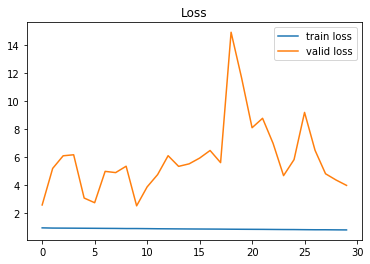

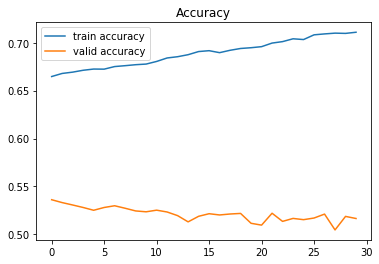

In [15]:
run(BATCH_SIZE[3])

## batch_size = 256

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.7519 - accuracy: 0.7331 - val_loss: 3.1655 - val_accuracy: 0.5163
Epoch 2/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.7446 - accuracy: 0.7351 - val_loss: 4.6010 - val_accuracy: 0.5160
Epoch 3/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.7415 - accuracy: 0.7368 - val_loss: 5.0054 - val_accuracy: 0.5160
Epoch 4/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.7415 - accuracy: 0.7369 - val_loss: 3.7047 - val_accuracy: 0.5156
Epoch 5/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.7340 - accuracy: 0.7389 - val_loss: 3.1969 - val_accuracy: 0.5191
Epoch 6/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.7338 - accuracy: 0.7391 - val_loss: 2.7027 - val_accuracy: 0.5136
Epoch 7/30
50000/50000 [==============================] - 2s 42us/st

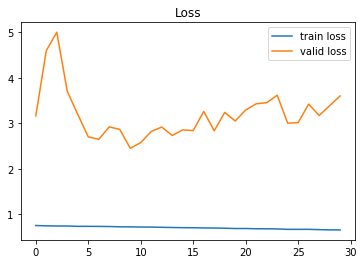

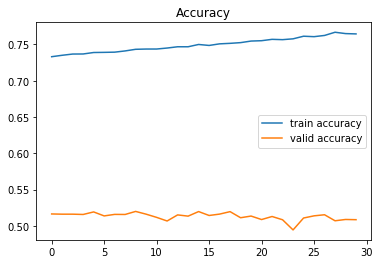

In [16]:
run(BATCH_SIZE[4])

## 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [17]:
model = build_mlp_bn(input_shape=x_train.shape[1:])
model.summary()
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0   

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 24s 475us/step - loss: 1.7330 - accuracy: 0.3800 - val_loss: 1.6709 - val_accuracy: 0.4049
Epoch 2/30
50000/50000 [==============================] - 23s 462us/step - loss: 1.5532 - accuracy: 0.4459 - val_loss: 1.5258 - val_accuracy: 0.4473
Epoch 3/30
50000/50000 [==============================] - 23s 461us/step - loss: 1.4648 - accuracy: 0.4798 - val_loss: 1.4643 - val_accuracy: 0.4763
Epoch 4/30
50000/50000 [==============================] - 23s 461us/step - loss: 1.3994 - accuracy: 0.5030 - val_loss: 1.4963 - val_accuracy: 0.4722
Epoch 5/30
50000/50000 [==============================] - 23s 461us/step - loss: 1.3463 - accuracy: 0.5227 - val_loss: 1.5129 - val_accuracy: 0.4604
Epoch 6/30
50000/50000 [==============================] - 23s 463us/step - loss: 1.2975 - accuracy: 0.5387 - val_loss: 1.4941 - val_accuracy: 0.4743
Epoch 7/30
50000/50000 [==============================] 

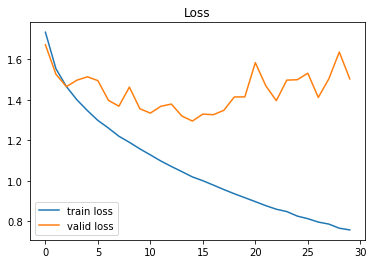

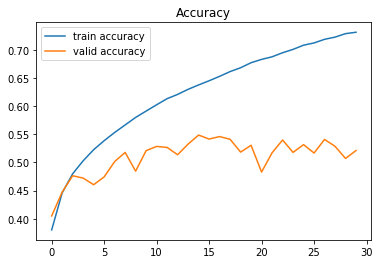

In [18]:
run(BATCH_SIZE[3])

## 請於 BN 放在 Input Layer 後，並比較結果

In [19]:
model = build_mlp_in(input_shape=x_train.shape[1:])
model.summary()
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 313us/step - loss: 1.9160 - accuracy: 0.3036 - val_loss: 1.6534 - val_accuracy: 0.4023
Epoch 2/30
50000/50000 [==============================] - 15s 308us/step - loss: 1.6506 - accuracy: 0.4043 - val_loss: 1.5531 - val_accuracy: 0.4383
Epoch 3/30
50000/50000 [==============================] - 15s 308us/step - loss: 1.5522 - accuracy: 0.4453 - val_loss: 1.4708 - val_accuracy: 0.4794
Epoch 4/30
50000/50000 [==============================] - 15s 307us/step - loss: 1.4728 - accuracy: 0.4746 - val_loss: 1.4406 - val_accuracy: 0.4858
Epoch 5/30
50000/50000 [==============================] - 15s 307us/step - loss: 1.4126 - accuracy: 0.4957 - val_loss: 1.4147 - val_accuracy: 0.4965
Epoch 6/30
50000/50000 [==============================] - 15s 307us/step - loss: 1.3565 - accuracy: 0.5157 - val_loss: 1.3589 - val_accuracy: 0.5186
Epoch 7/30
50000/50000 [==============================] 

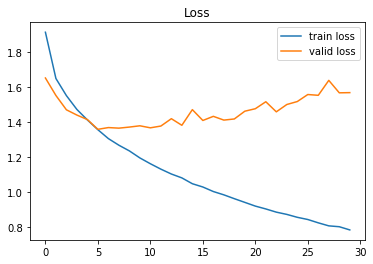

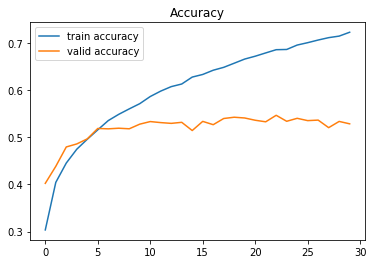

In [20]:
run(BATCH_SIZE[3])